Implement the de Boor algorithm (Dahmen+Reusken Alg 9.12) for evaluating spline functions 

$$ \sum c_j N_{j,k}(x).$$

Familiarize yourself also with the scipy.interpolate.splev function and related functions.

Consider the curve given by
$$ \gamma: [0,1]→ R^2: t→((t+ 1) cos(4\pi t),(t+ 1) sin(4 \pi t))$$

Choose control points $p_j=\gamma(j/n)$, and plot the spline functions 

$$t → ∑_{j=0}^n p_j N_{j,k}(t)$$
for $k= 1,2,3,4$.

Choose uniformly distributed knots, with k multiple knots at the ends. Note that choosing the control points at the curve does not lead to optimal approximation of the curve by the spline-curve.

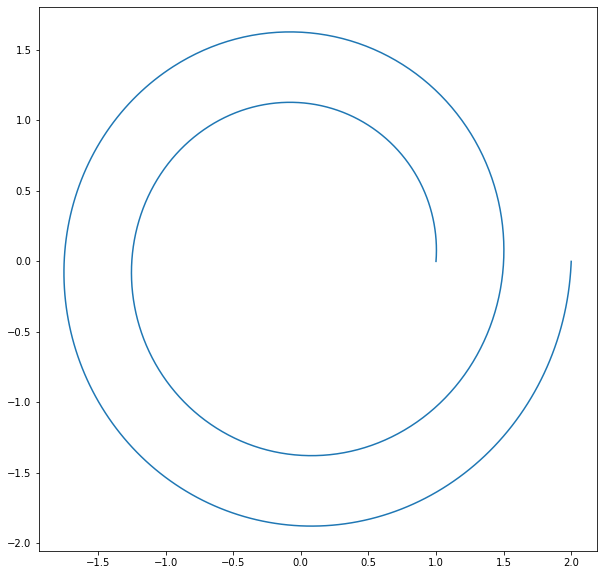

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


t = np.linspace(0, 1, 1000)

def gamma_fun(t):
    return (t+1)*np.cos(4*np.pi*t), (t+1)*np.sin(4*np.pi*t)

x, y = gamma_fun(t)

plt.figure(figsize = (10, 10))
plt.plot(x, y)

In [88]:
def deBoor(t, x, c, k):
    """
    Evaluates S(x).

    Args
    ----
    k: index of knot interval that contains x
    x: position
    t: array of knot positions, needs to be padded as described above
    c: array of control points
    p: degree of B-spline
    """
    p = k-1
    k = np.logical_and((x >= t[:-1]), (x < t[1:])).nonzero()[0][0]
    
    c_ = [c[j + k - p] for j in range(0, p+1)]
    
    # p+1 = k
    # iterate over k
    for r in range(1, p+1):
        # n bis aktuelles k-1 rückwärts
        for j in range(p, r-1, -1):
            alpha = (x - t[j+k-p]) / (t[j+1+k-r] - t[j+k-p])
            c_[j] = (1.0 - alpha) * c_[j-1] + alpha * c_[j]

    return c_[p]

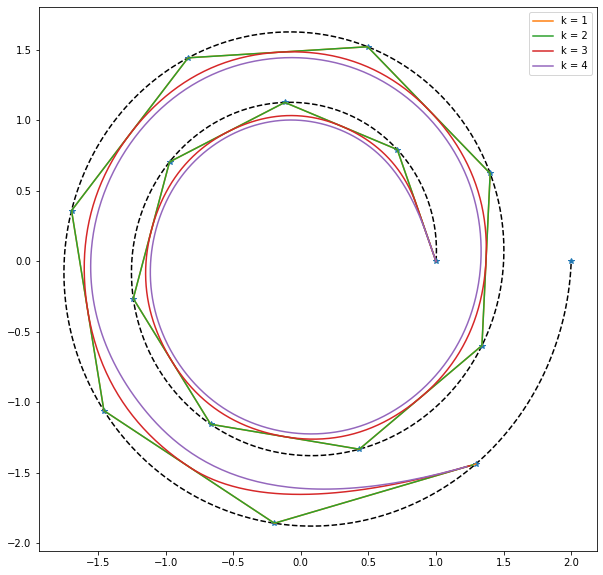

In [89]:
plt.figure(figsize = (10, 10))
t = np.linspace(0, 1, 1000, endpoint=True)
x, y = gamma_fun(t)
plt.plot(x, y, '--k')

n = 16
t = np.linspace(0, 1, n, endpoint=True)
p_x, p_y = gamma_fun(t)
plt.plot(p_x, p_y, '*')

t_x_list = np.linspace(0, 1, 1000, endpoint=False)

for k in [1,2,3,4]:
    # control points:
    
    t = np.linspace(0, 1, n, endpoint=True)

    t = np.concatenate((np.ones(k-1)*t[0], t, np.ones(k-1)*t[-1]))
    p_x, p_y = gamma_fun(t)

    spline_x = np.empty(t_x_list.size)
    spline_y = np.empty(t_x_list.size)

    for idx, t_x in enumerate(t_x_list):
        spline_x[idx] = deBoor(t, t_x, p_x, k)
        spline_y[idx] = deBoor(t, t_x, p_y, k)

    plt.plot(spline_x, spline_y, label="k = "+str(k))

plt.legend()

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42
0.43
0.44
0.45
0.46
0.47000000000000003
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.96
0.97
0.98
0.99


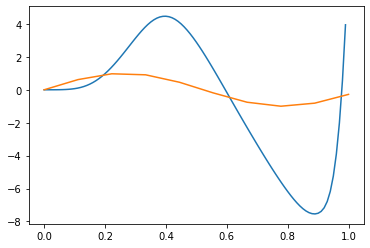

In [107]:
def deBoorDerivative(k, x, t, c, p):
    """
    Evaluates S(x).

    Args
    ----
    k: index of knot interval that contains x
    x: position
    t: array of knot positions, needs to be padded as described above
    c: array of control points
    p: degree of B-spline
    """
    q = [p * (c[j+k-p+1] - c[j+k-p]) / (t[j+k+1] - t[j+k-p+1]) for j in range(0, p)]

    for r in range(1, p):
        for j in range(p-1, r-1, -1):
            right = j+1+k-r
            left = j+k-(p-1)
            alpha = (x - t[left]) / (t[right] - t[left])
            q[j] = (1.0 - alpha) * q[j-1] + alpha * q[j]

    return q[p-1]

x = np.linspace(0, 1, 10, endpoint=True)
k_max = 5
x = np.concatenate((np.ones(k_max-5)*x[0], x, np.ones(k_max)*x[-1]))
y = np.sin(6*x)



x_plot = np.linspace(0, 1, 100, endpoint=False)

y_plot = np.empty(x_plot.size)

for idx, c_x_plot in enumerate(x_plot):
    print(c_x_plot)
    k = np.logical_and((c_x_plot >= x[:-1]), (c_x_plot < x[1:])).nonzero()[0][0]
    y_plot[idx] = deBoorDerivative(k, c_x_plot, x, y, k_max)

plt.figure()
plt.plot(x_plot, y_plot)
plt.plot(x, y)